[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/zhimingkuang/Harvard-AM-115/blob/main/04_population_single_3/stochastic_simulation_logistic.ipynb)

## HW2 Group Portion

by Ramses Martinez, Taghe Scannell, Kaylee Vo

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Simulation of the stochastic logistic equations, based on "Modelling biological populations in space and time", Eric Renshaw

In [2]:
# Set parameters for logistic equation: X_t=R*X*(1-X/K)
R = 1.0
K = 50
dimP = (
    K * 10
)  # number of points at which pdf is defined, need to be larger than carrying capacity:
# this is because we might get population values larger than K due to stochasticity

# Corresponding birth-death probability, see lecture notes for the mapping
mu = R / K
lam = R * (1 - (1 / K))

# Simulate the stochastic logistic equation, using section 3.4
nsteps = 10000
N = np.zeros(nsteps)
N[0] = 3
t = 0
dt = 10 ** (-3)

From lecture, we were given the differential equation: 

$$
\frac{dP_N}{dt} = B(N-1)P_{N-1}(t) + D(N+1)P_{N+1}(t) - (B(N) + D(N))P_N(t).
$$

The steady state probability mass function for the equation is a truncated Poisson distribution:

$$
Pr(X = N) = \frac{(\lambda/\mu)^N}{N! [\exp(\lambda/\mu) - 1]} \quad \text{for} ~ N = 1, 2, 3, ...
$$

This will be a resulting distribution. We can also determine the mean of the distribution, which is $\lambda/\mu$.

In [3]:
lam / mu

49.0

From above, this means we should get a truncated Poisson distribution centered around 49. Now let's run a single simulation of the stochastic logistic equation.

In [4]:
# Think about what happens if dt is too large, and why?
while t < nsteps - 1 and N[t] > 0:
    r = np.random.rand(1)
    if r < lam * N[t] * dt:
        N[t + 1] = N[t] + 1
    elif r < (lam * N[t] + mu * N[t] * (N[t] - 1)) * dt:
        N[t + 1] = N[t] - 1
    else:
        N[t + 1] = N[t]
    t = t + 1

In [5]:
# Customize for matplotlib
# If interested in the matplotlib object hierarchy, check: https://realpython.com/python-matplotlib-guide/
plt.rcParams["axes.linewidth"] = 1
plt.rcParams["xtick.bottom"] = True
plt.rcParams["ytick.left"] = True
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["mathtext.default"] = "regular"
# Change font size: http://www.futurile.net/2016/02/27/matplotlib-beautiful-plots-with-style/
plt.rcParams["font.size"] = 12
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams["legend.fontsize"] = 14
plt.rcParams["figure.titlesize"] = 20

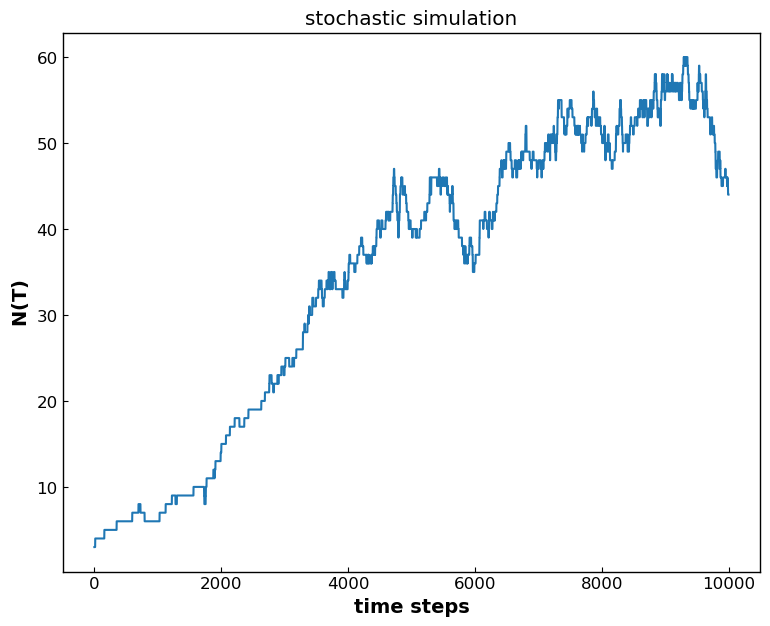

In [6]:
# Plot solution
fig, ax = plt.subplots(1, 1, figsize=(9, 7))

ax.plot(np.arange(nsteps), N, linewidth=1.5)

# Set title and axes labels
ax.set_title("stochastic simulation")
ax.set_xlabel("time steps")
ax.set_ylabel(r"$N(T)$")

plt.show()

Now let's run 5000 simulations with 10000 time steps each. The rows of `Ns` will be the simulation and the columns will be the time steps. We keep the initial condition and parameters fixed over each simulation.

In [7]:
## Multiple Simulations

nreps = 5000
nsteps = 10000
Ns = np.zeros((nreps, nsteps))

for i in range(nreps):
    N = np.zeros(nsteps)
    N[0] = 3
    t = 0
    dt = 10 ** (-3)

    # Borrowed from above
    while t < nsteps - 1 and N[t] > 0:
        r = np.random.rand(1)
        if r < lam * N[t] * dt:
            N[t + 1] = N[t] + 1
        elif r < (lam * N[t] + mu * N[t] * (N[t] - 1)) * dt:
            N[t + 1] = N[t] - 1
        else:
            N[t + 1] = N[t]
        t = t + 1

    Ns[i, :] = N

Now we plot all 50 plots for each 100 time steps. Alternatively, one can skip down to the last plot to see an animation of the distribution shift.

In [8]:
def plot_simulation(Ns):

    for t in range(99, nsteps, 100):

        final_counts = Ns[:, t]
        unique, counts = np.unique(final_counts, return_counts=True)
        distribution_mean = round(np.mean(final_counts), 2)

        # Visualize
        plt.bar(unique, counts)
        plt.title(
            "Final Population Distribution \n t="
            + str(t)
            + ", mean = "
            + str(distribution_mean)
        )
        plt.xlabel("Population (N)")
        plt.ylabel("Count")
        plt.show()

Note, for the plots, we count $t=0$ as the first time step. Therefore 100 steps after would be $t=99$.

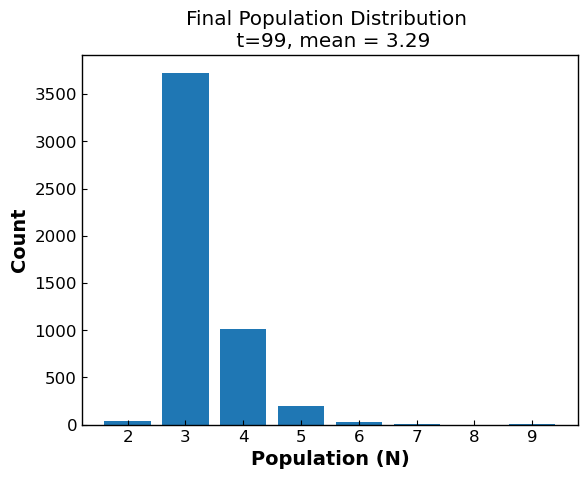

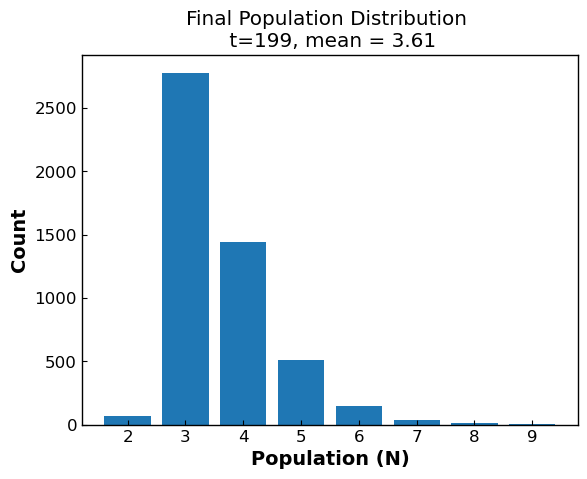

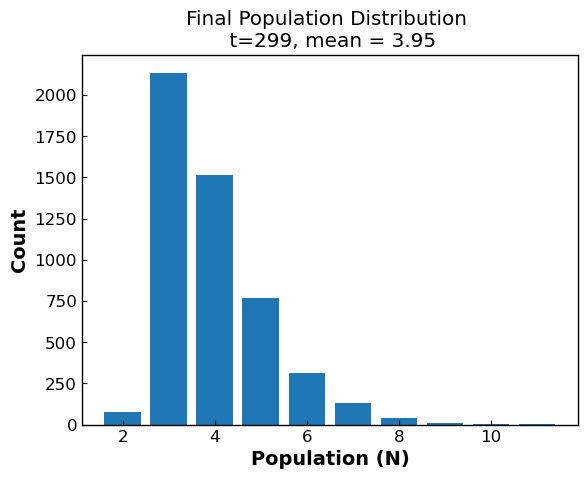

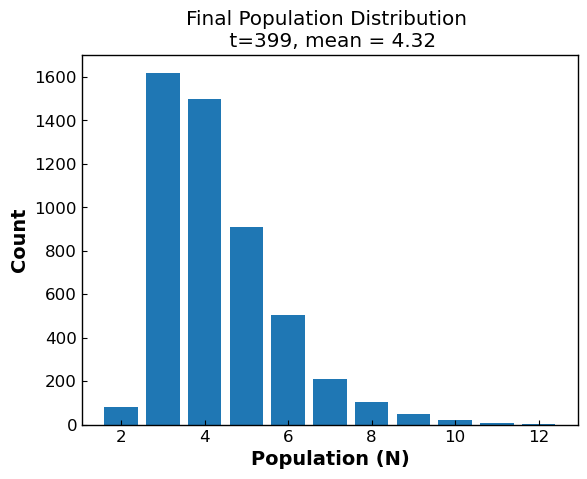

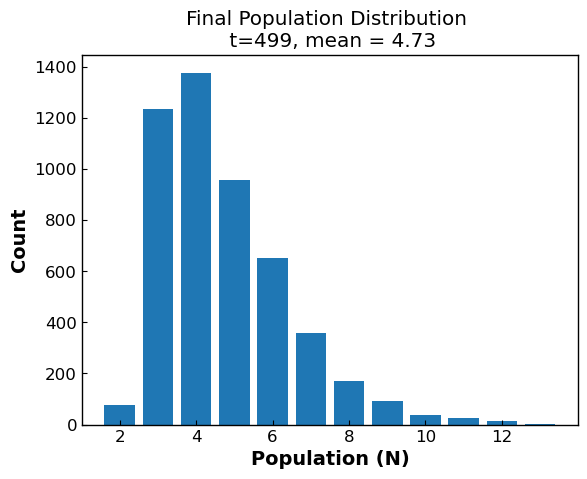

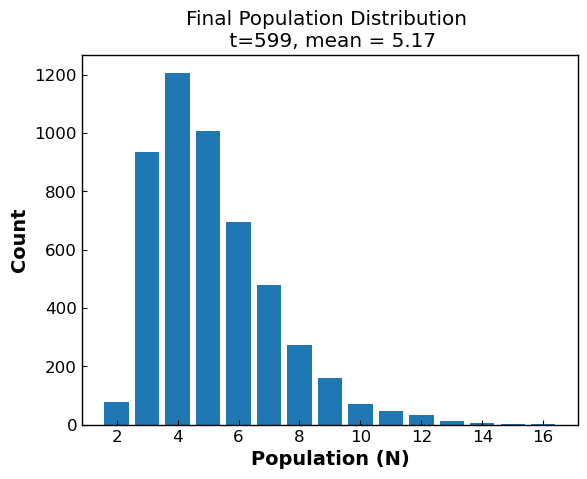

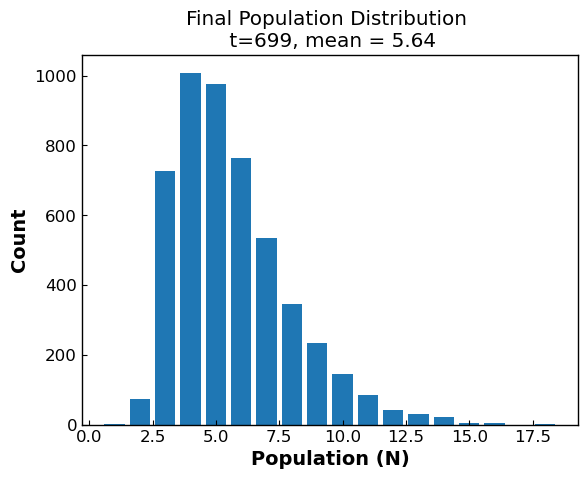

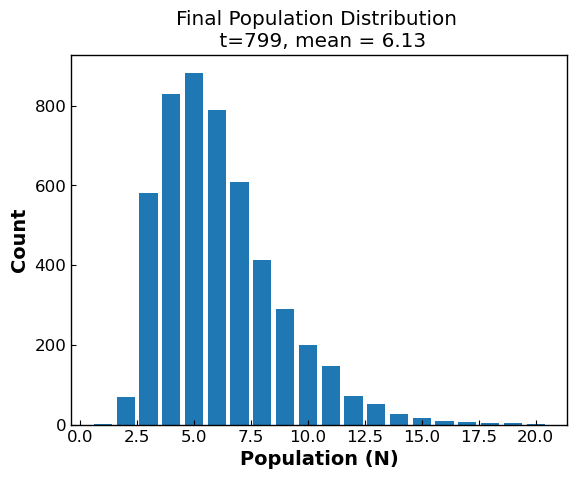

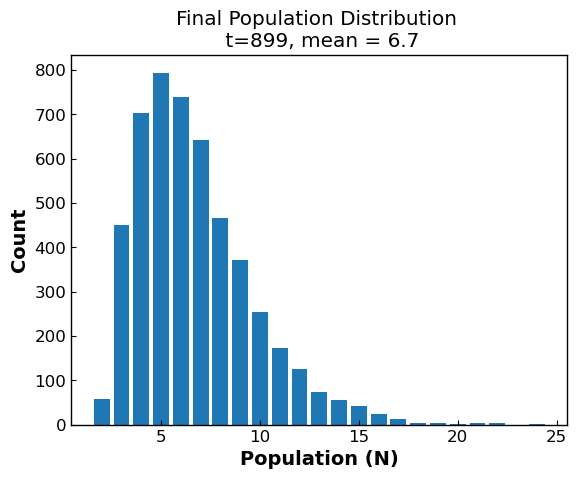

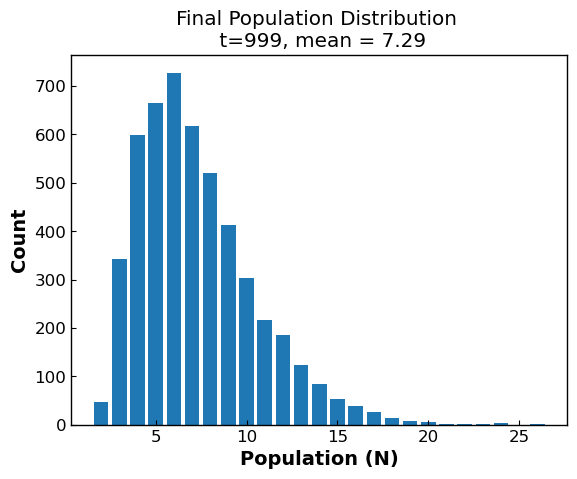

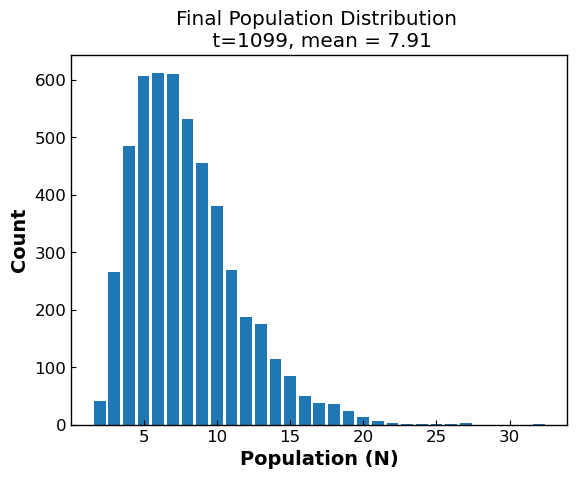

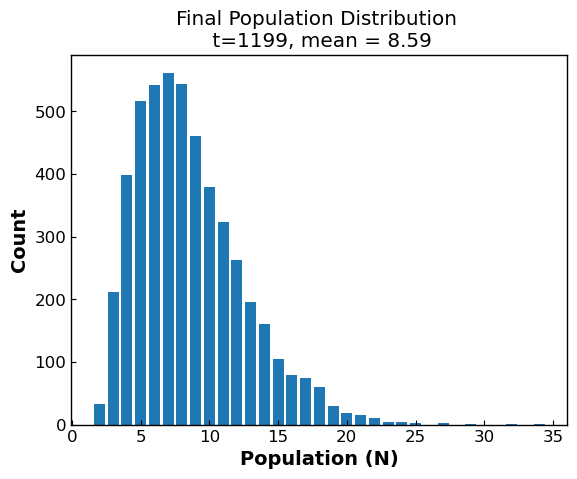

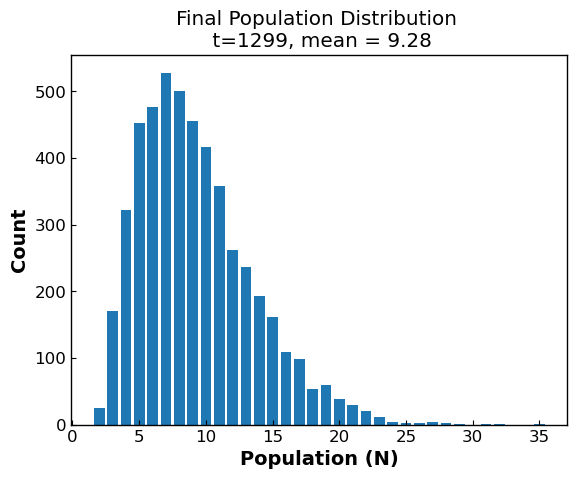

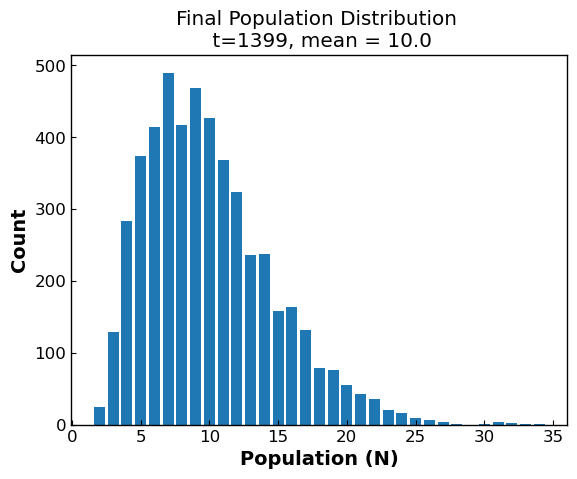

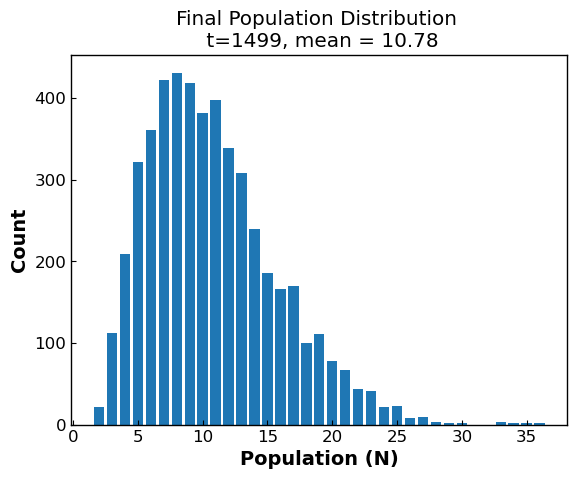

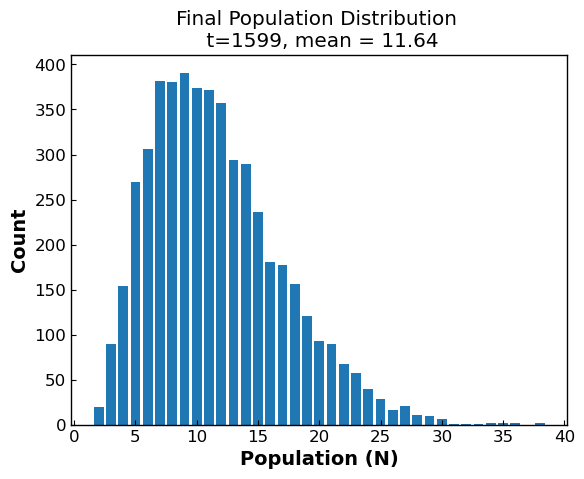

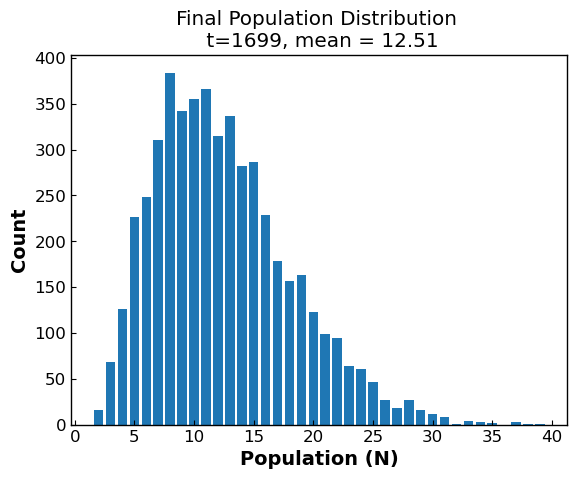

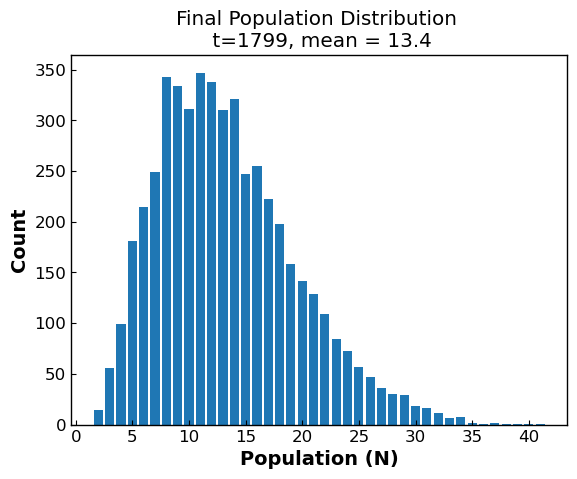

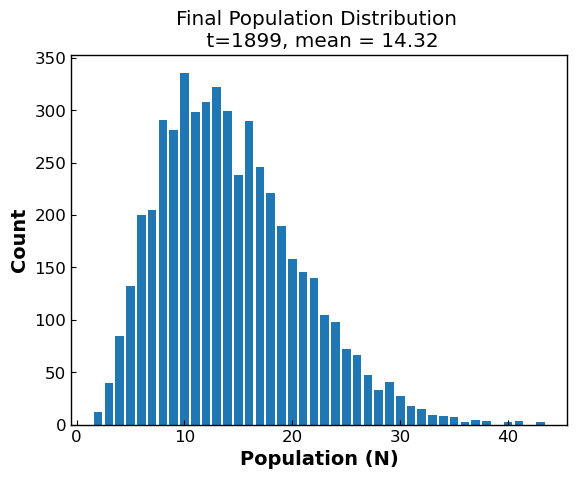

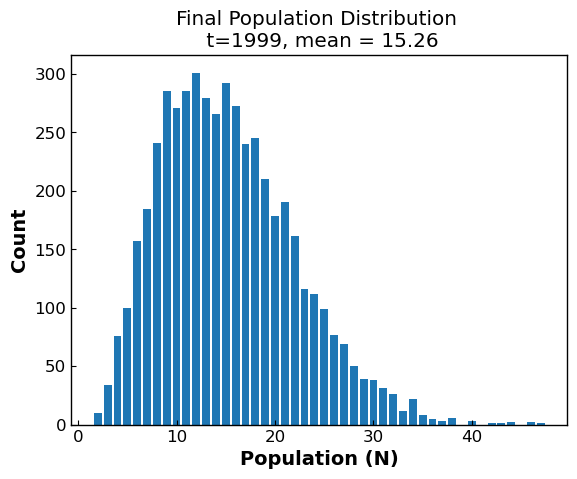

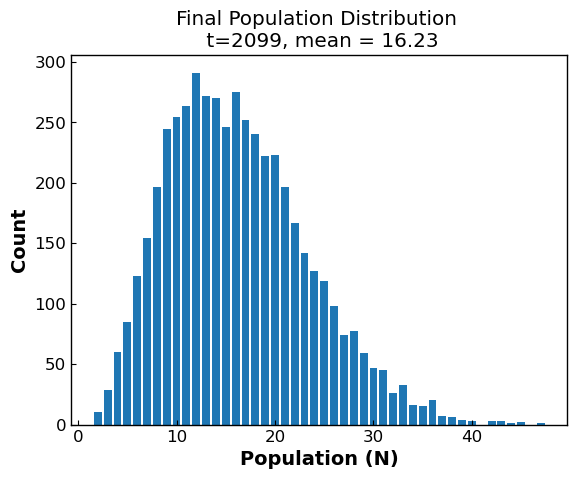

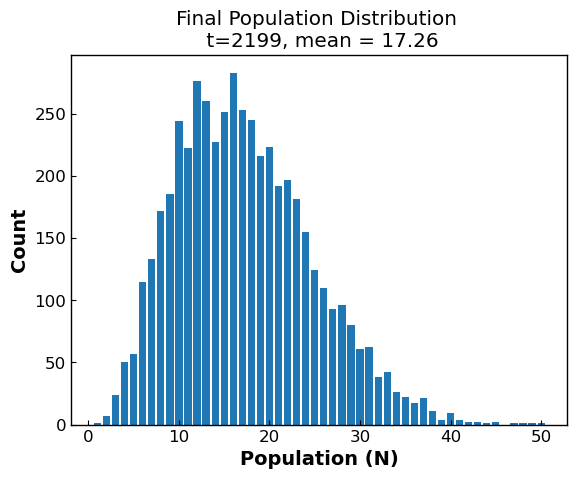

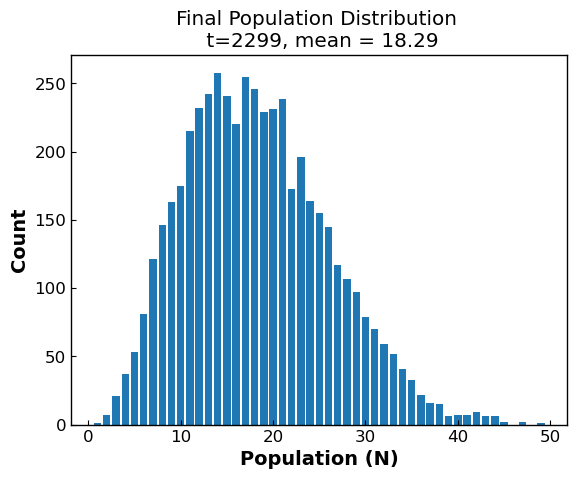

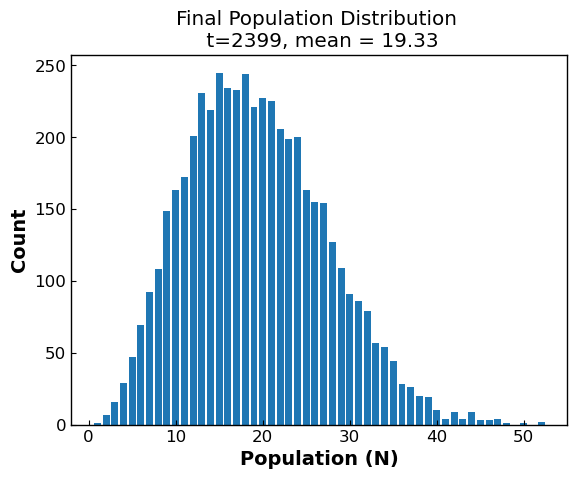

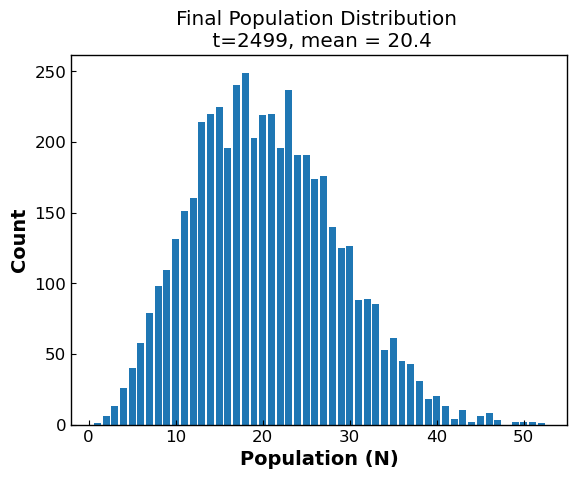

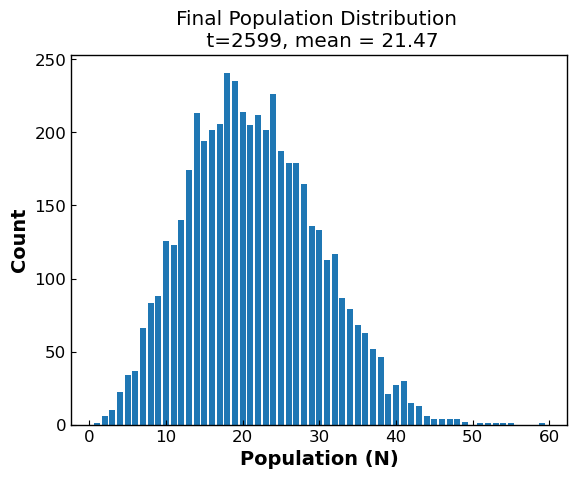

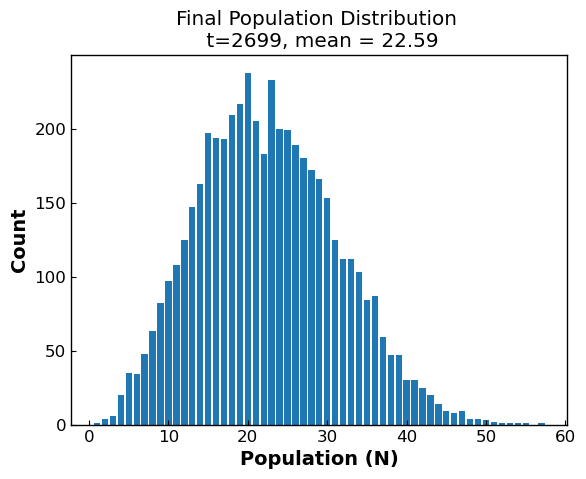

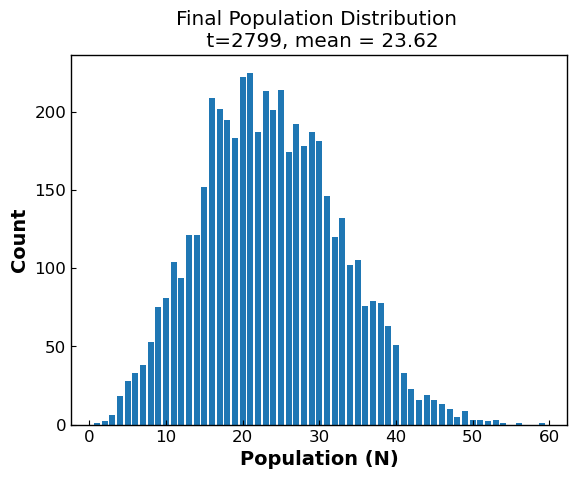

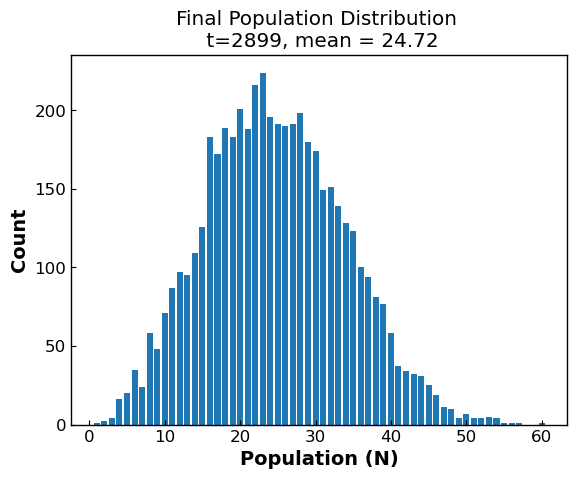

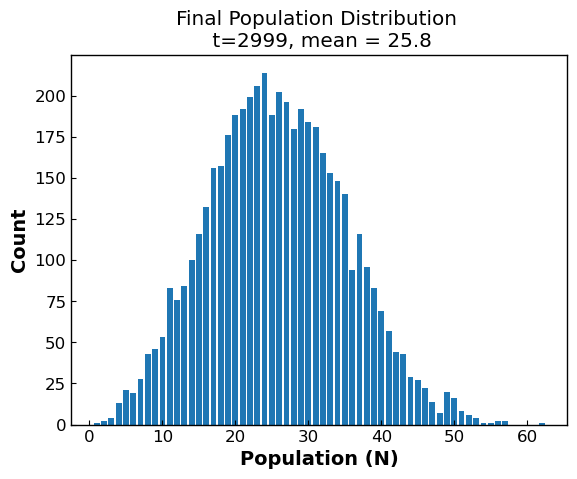

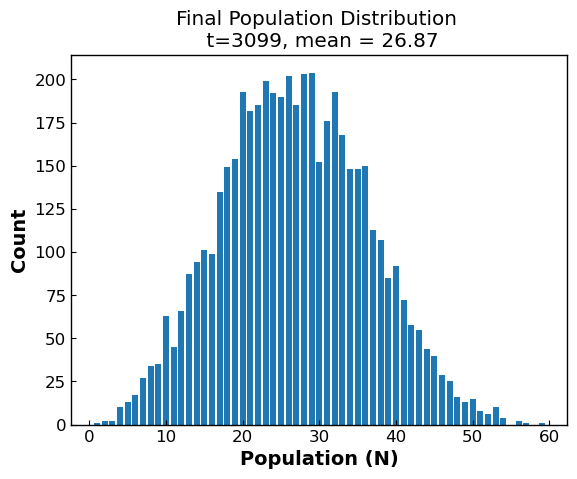

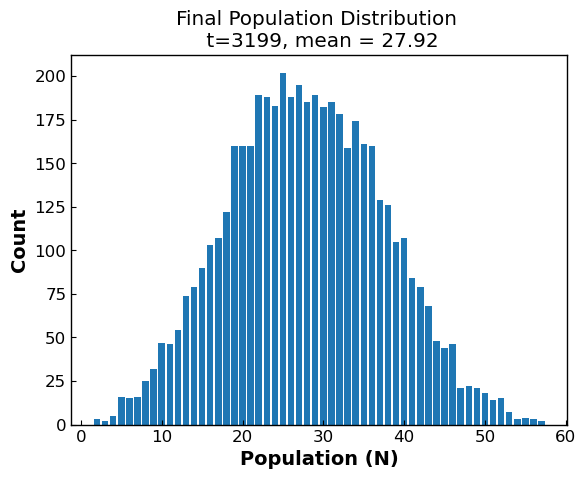

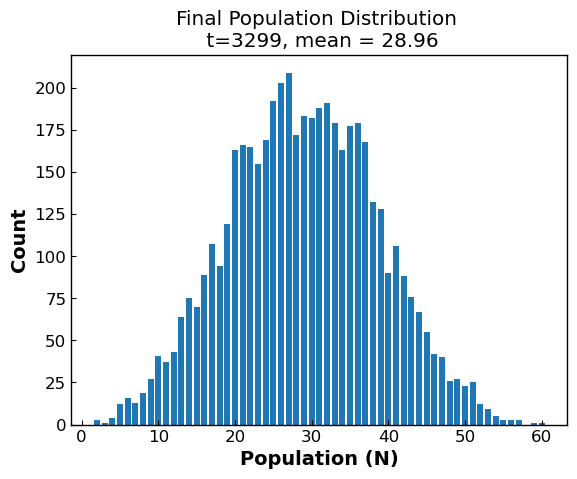

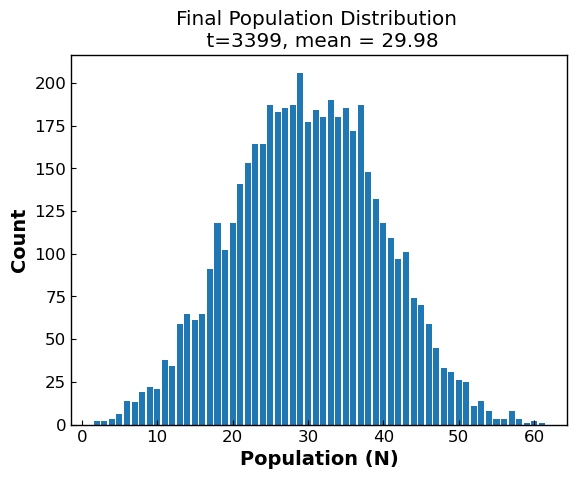

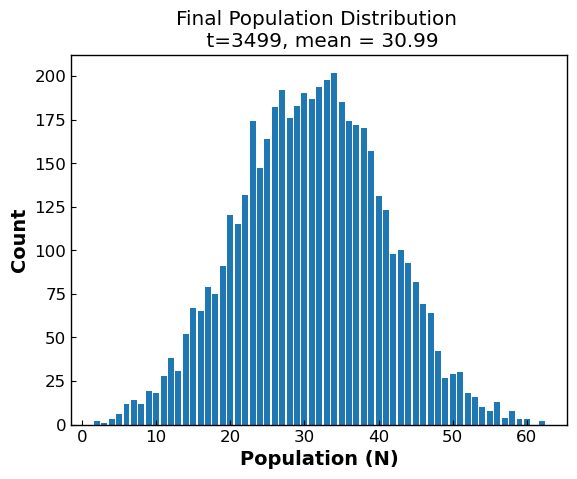

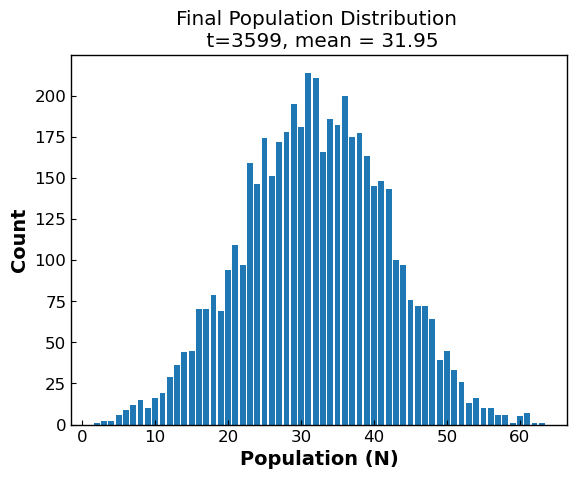

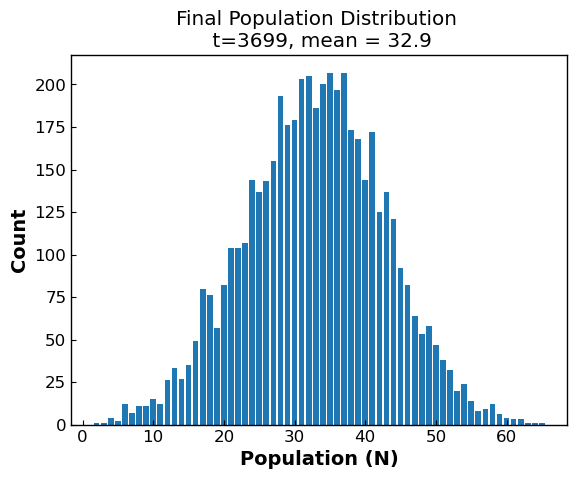

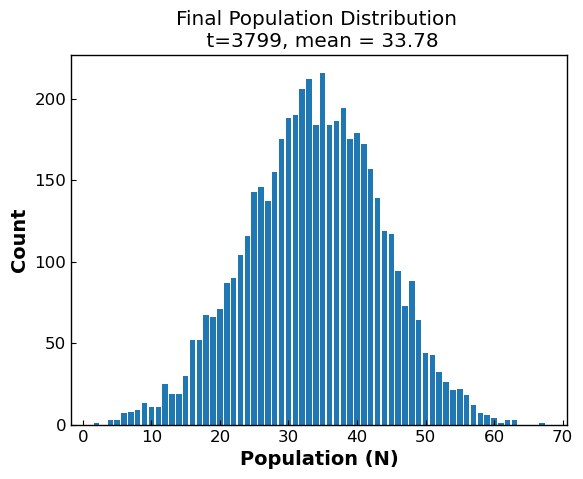

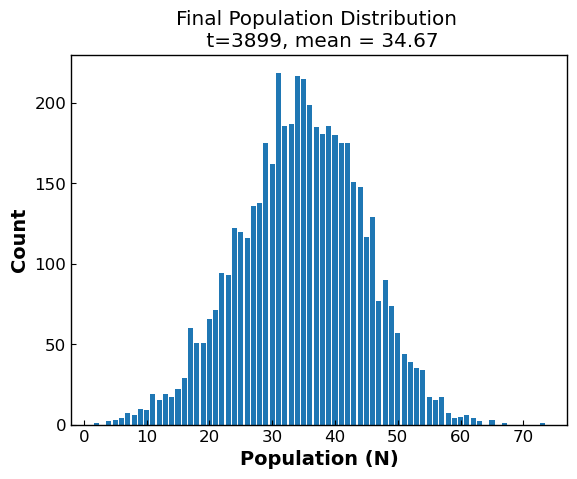

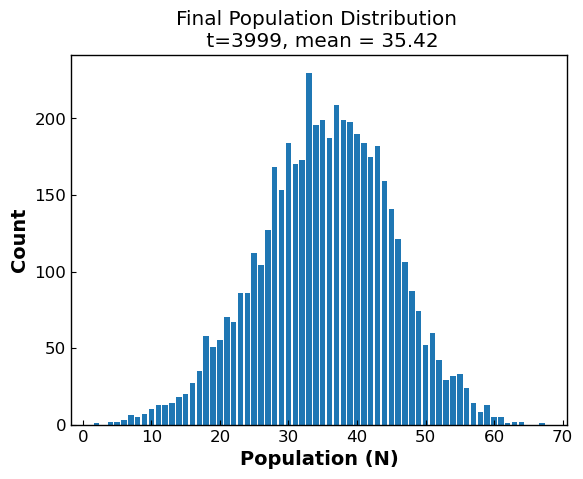

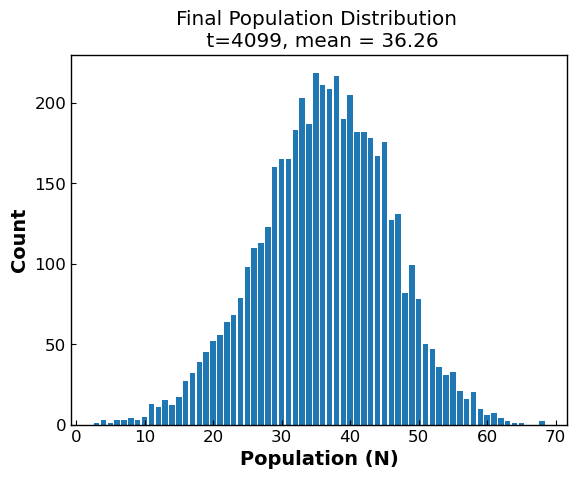

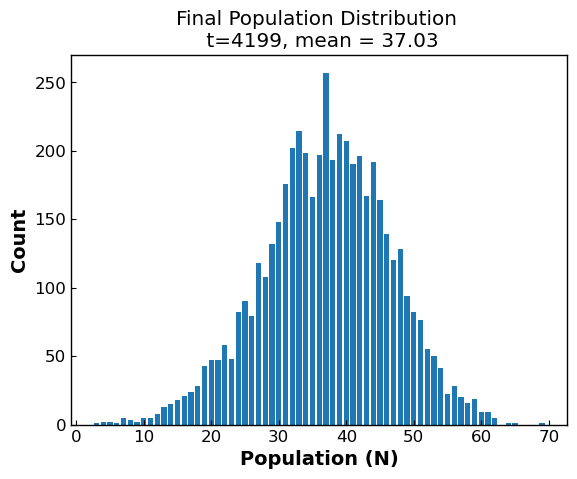

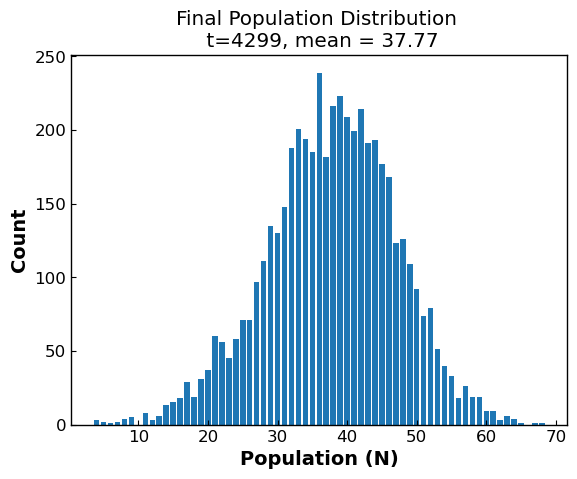

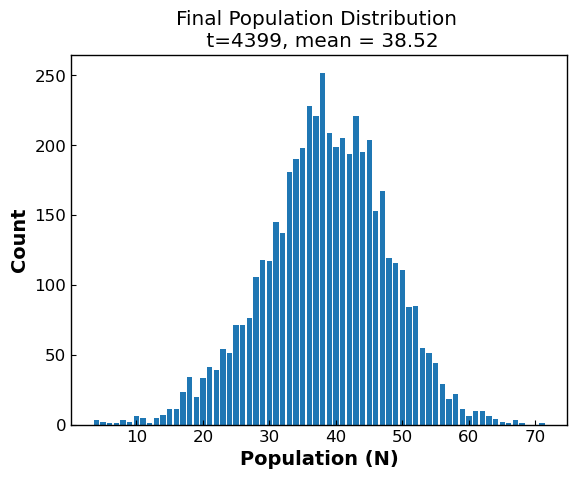

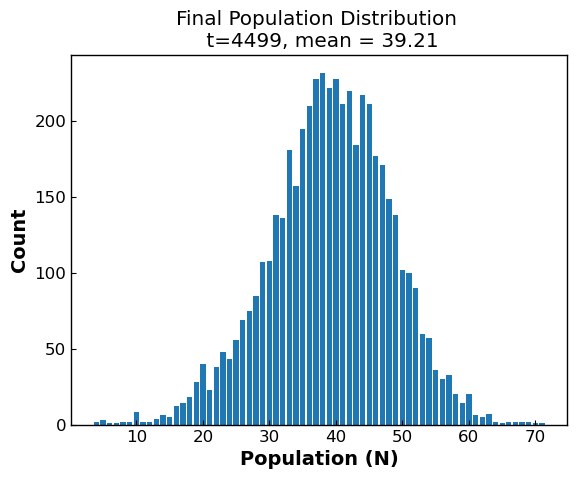

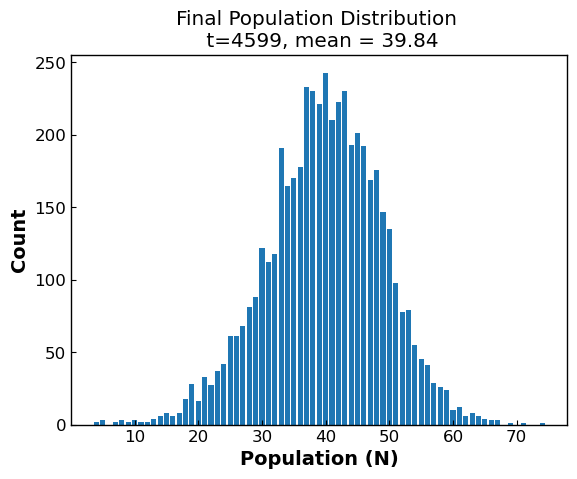

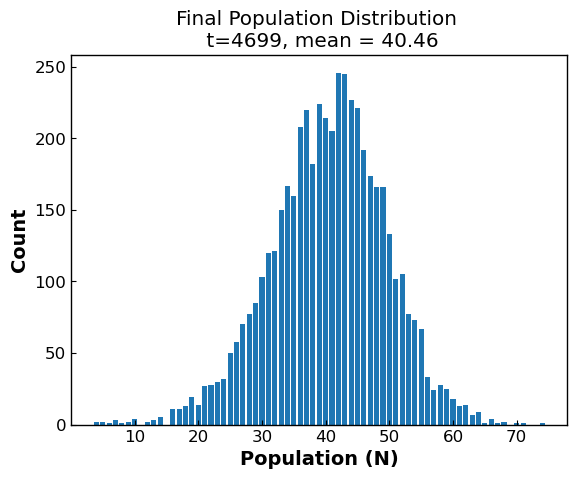

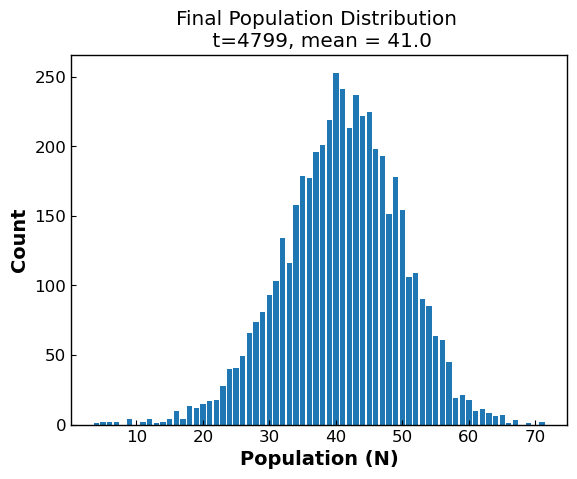

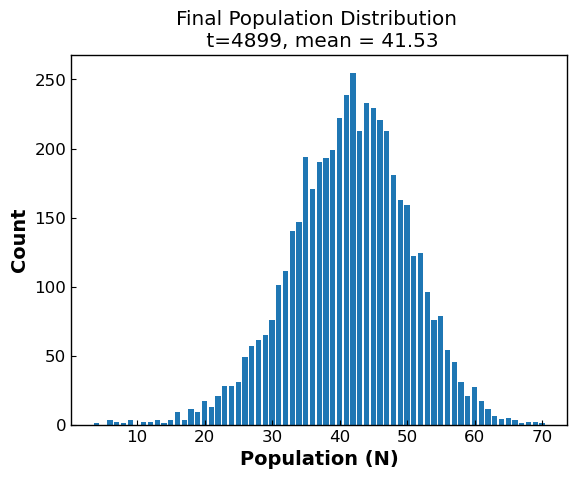

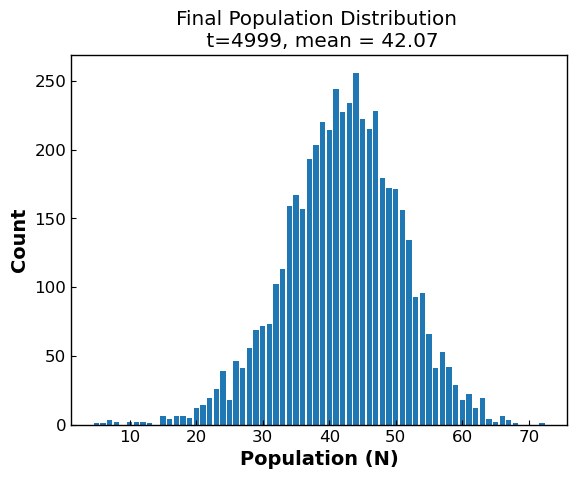

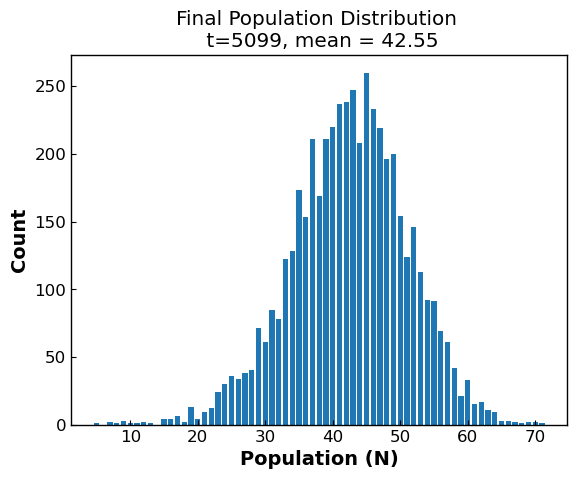

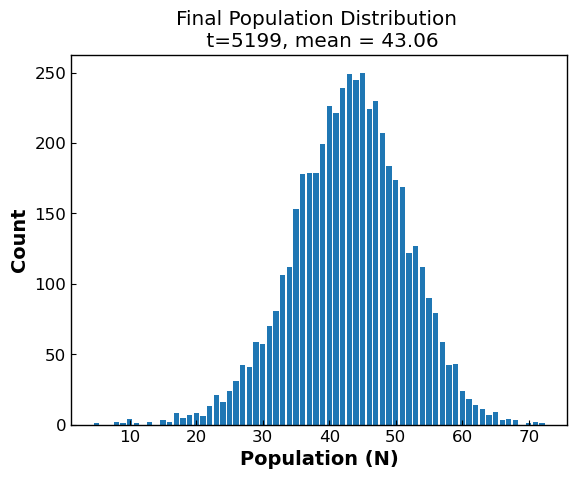

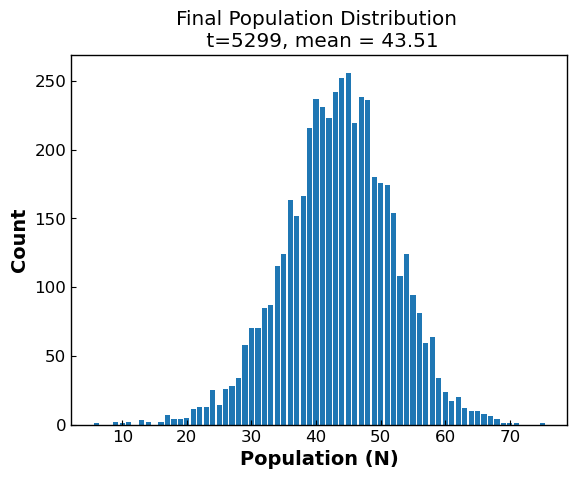

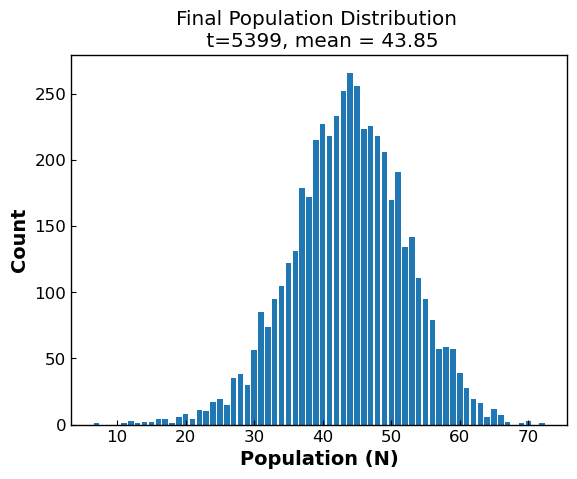

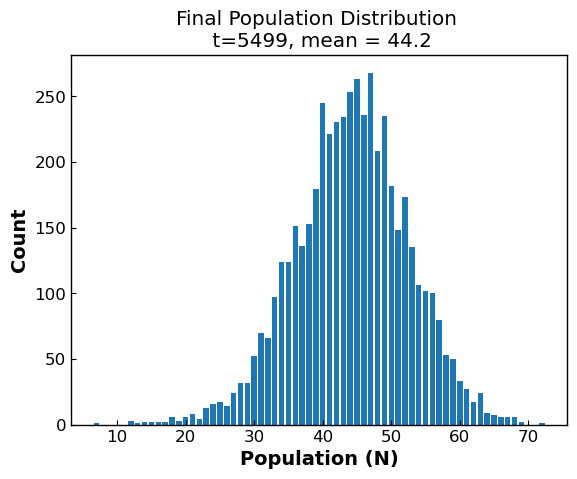

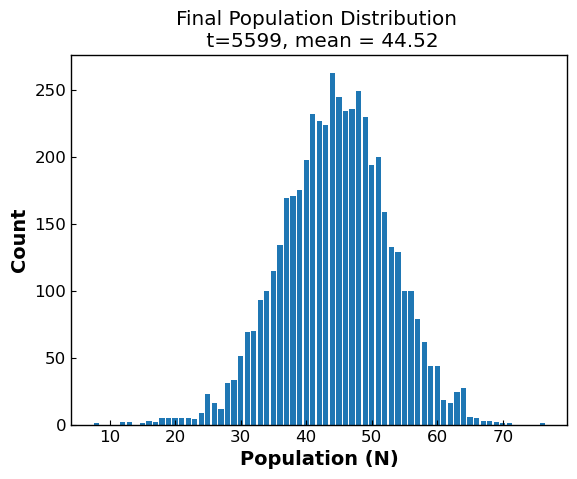

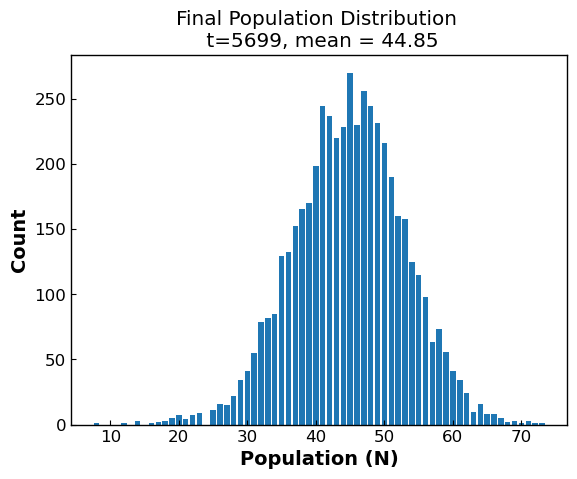

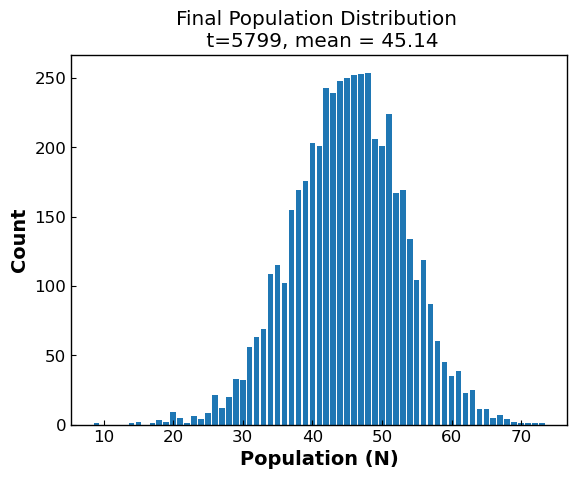

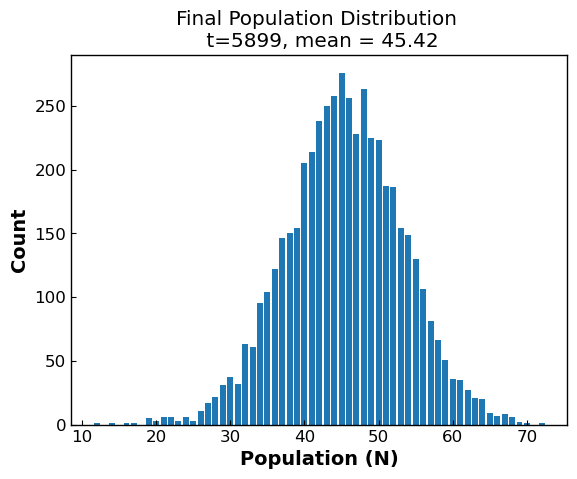

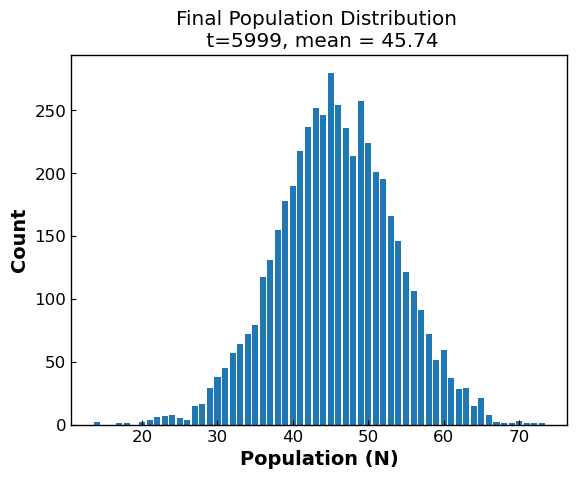

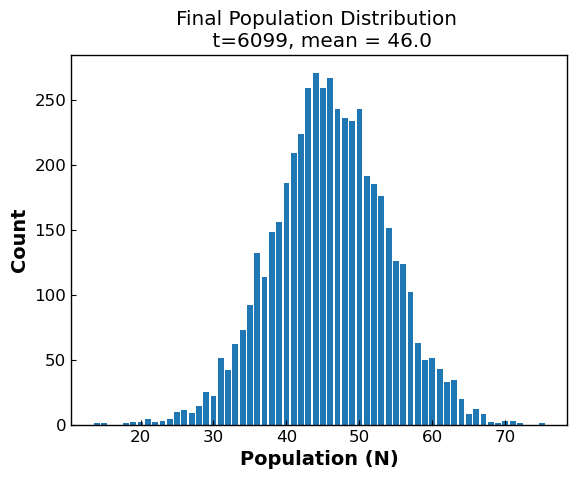

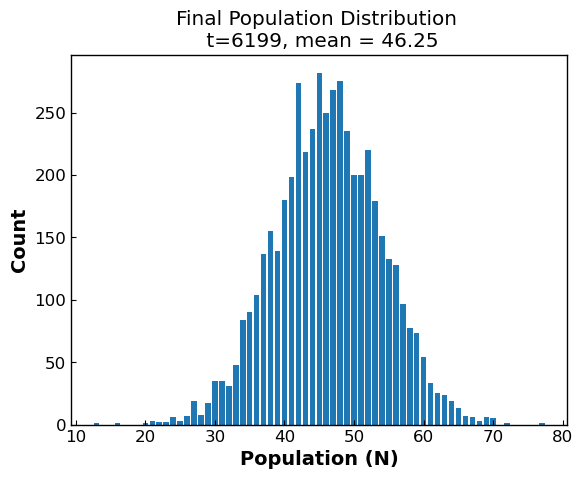

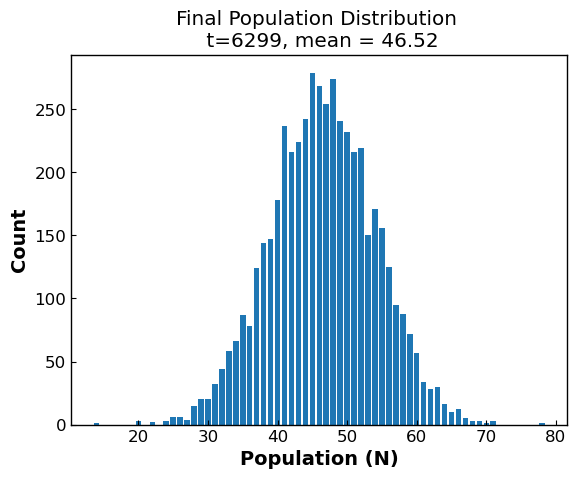

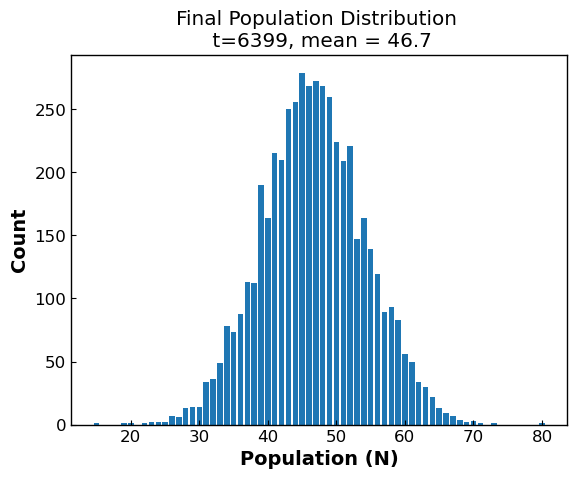

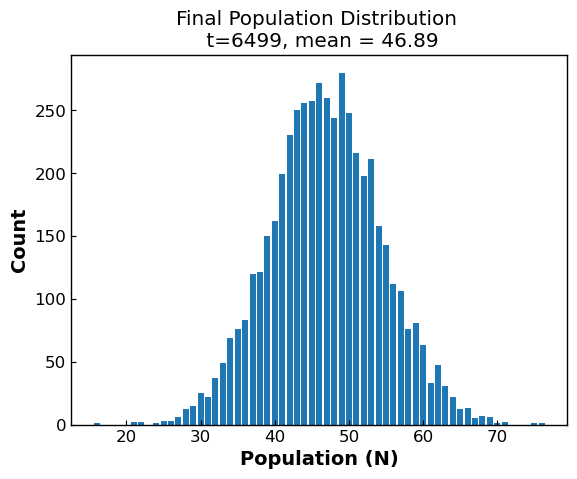

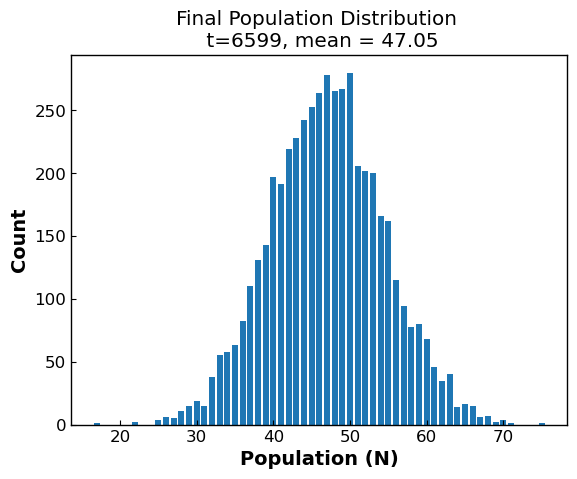

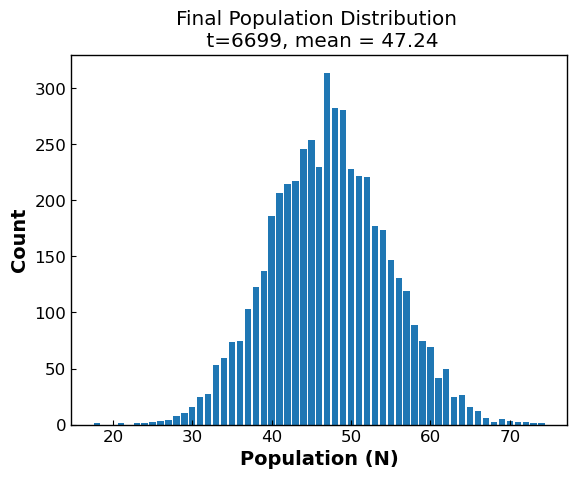

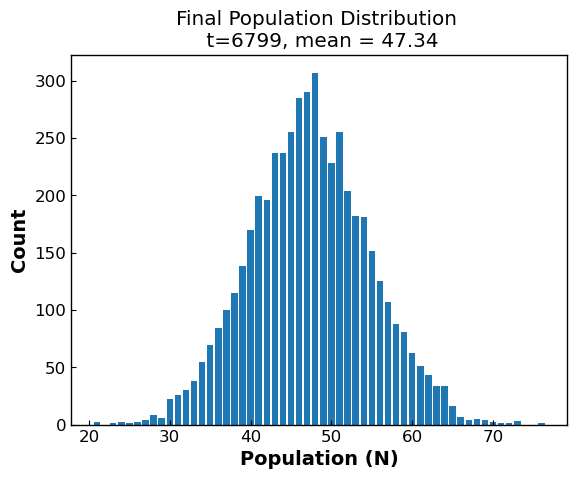

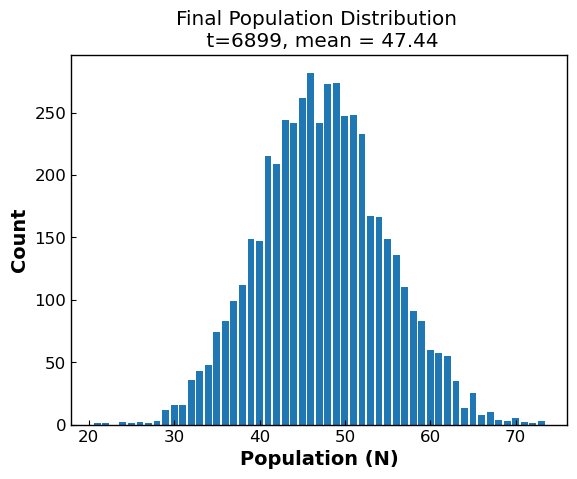

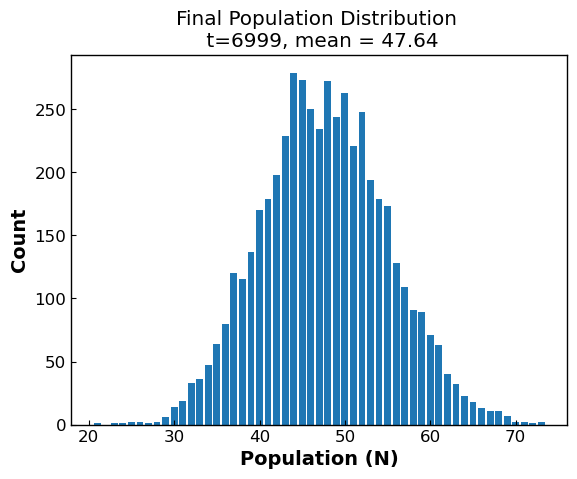

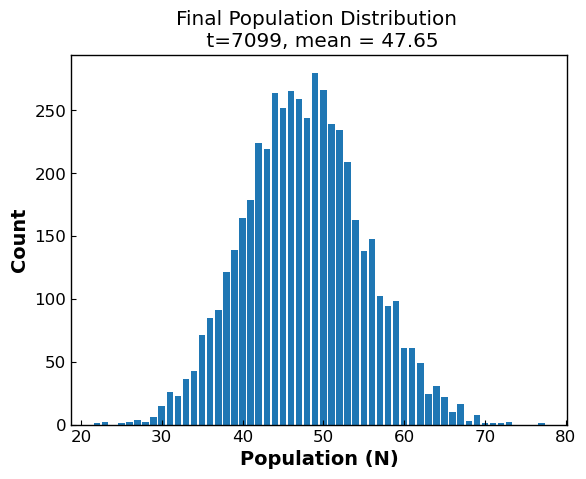

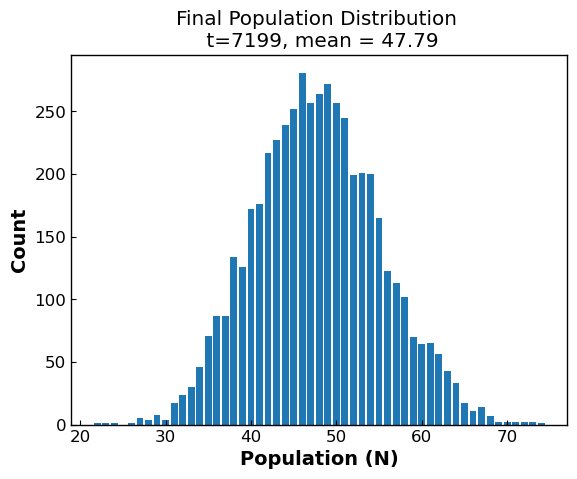

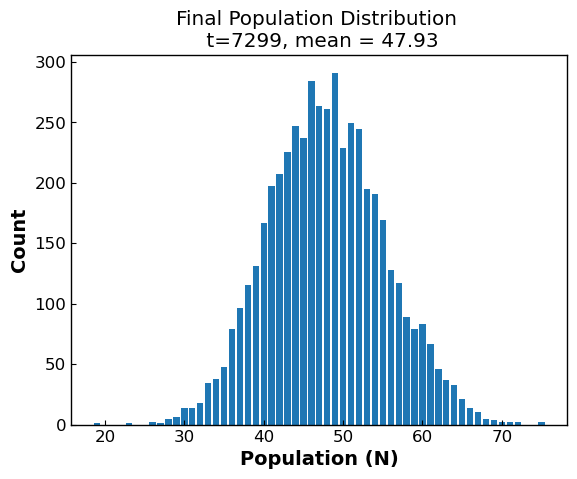

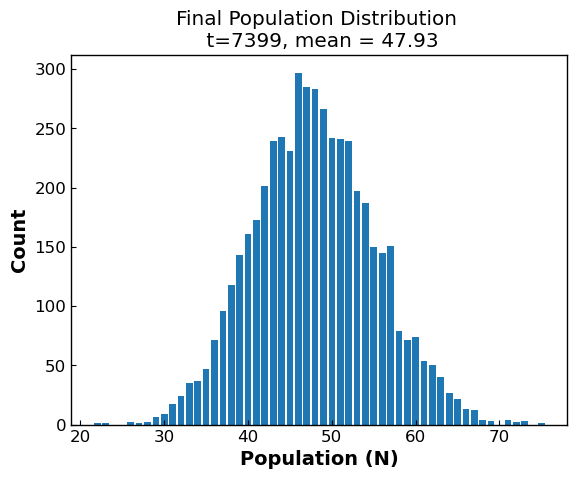

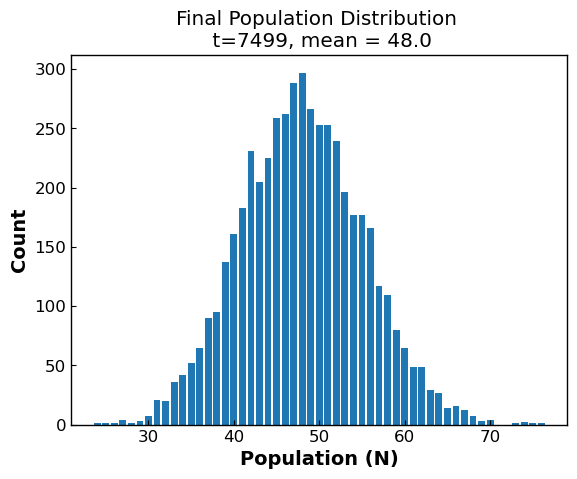

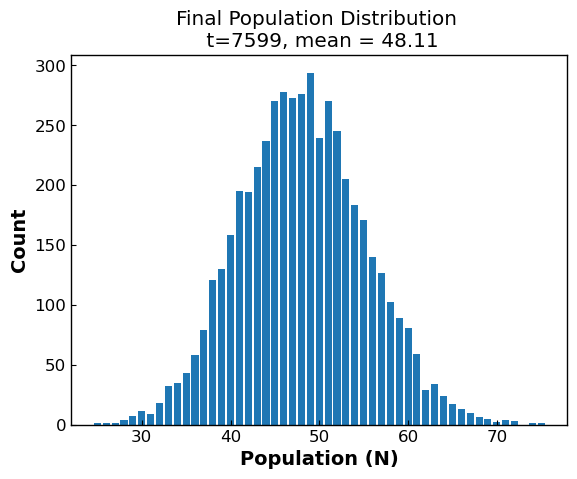

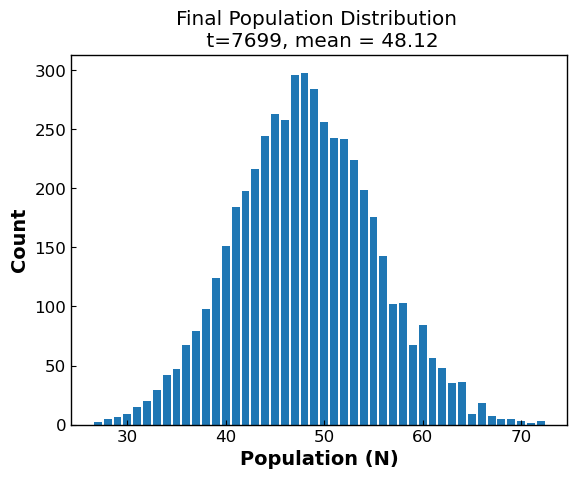

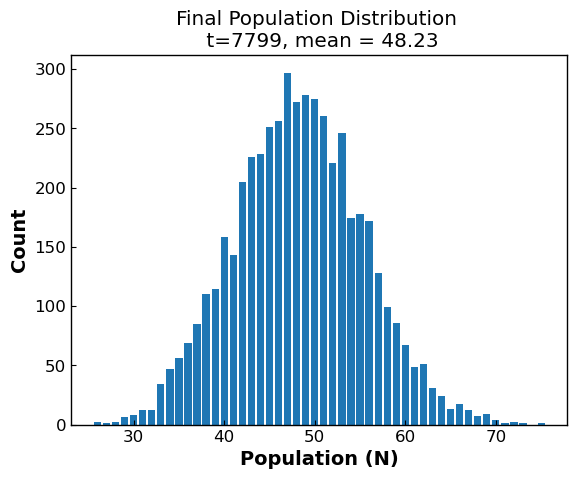

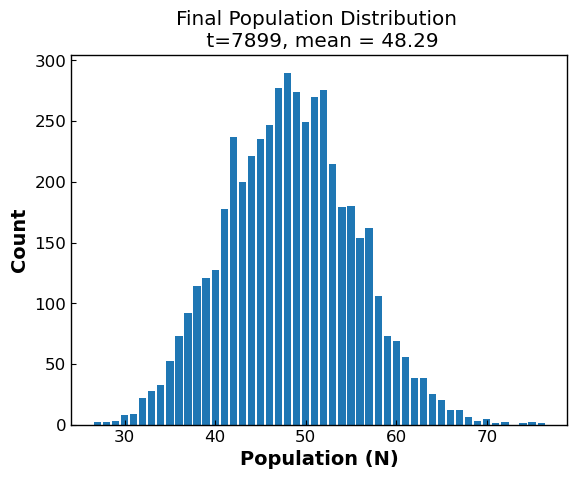

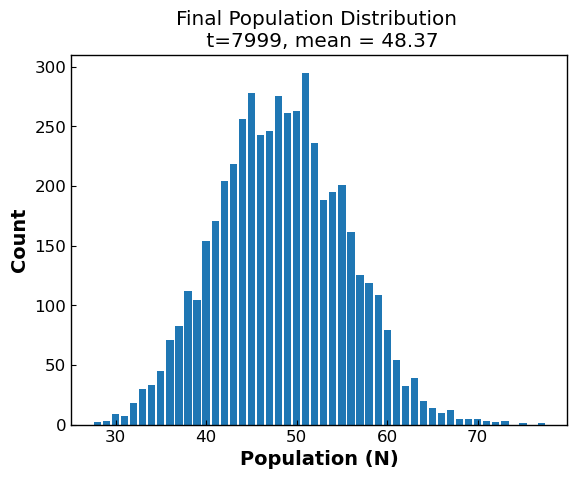

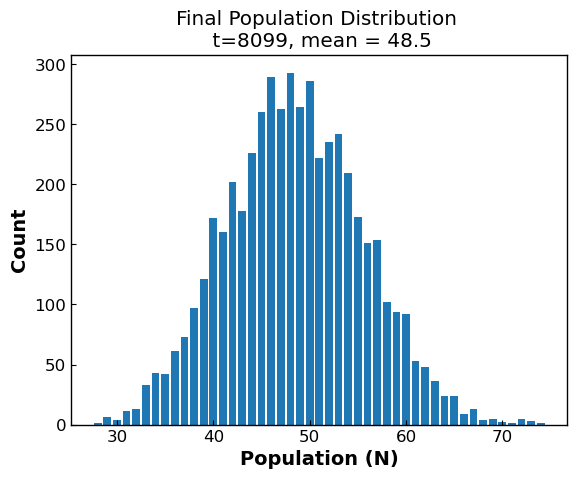

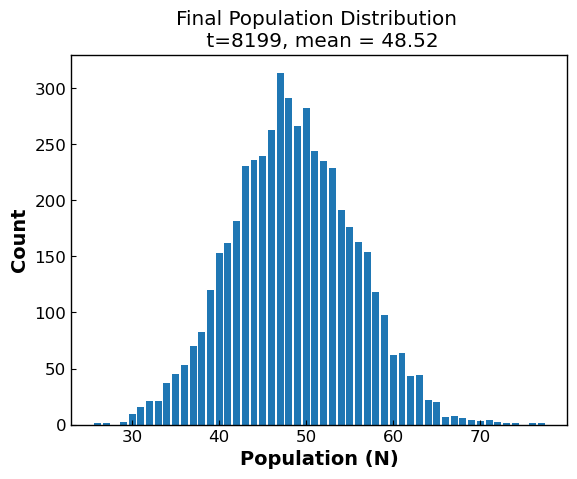

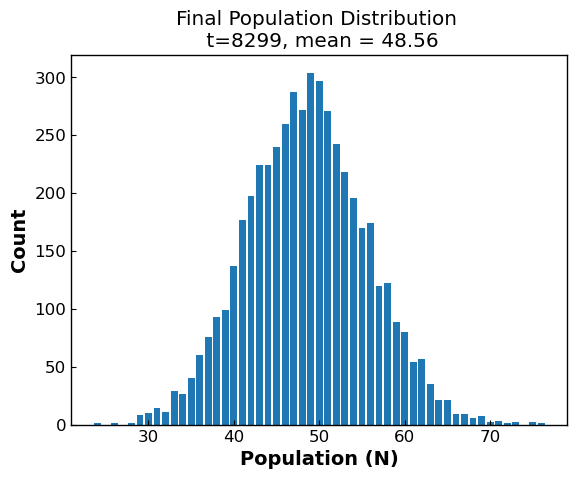

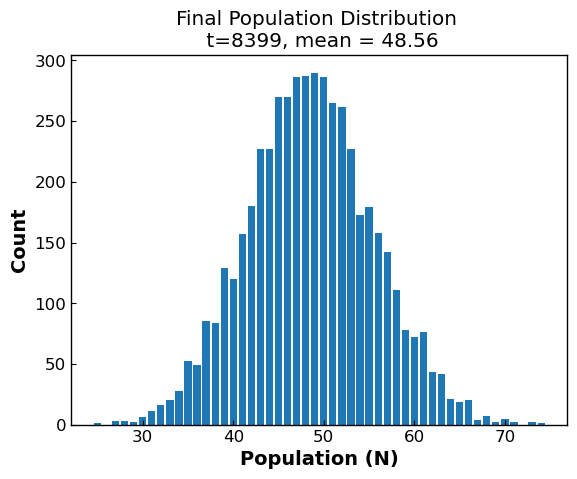

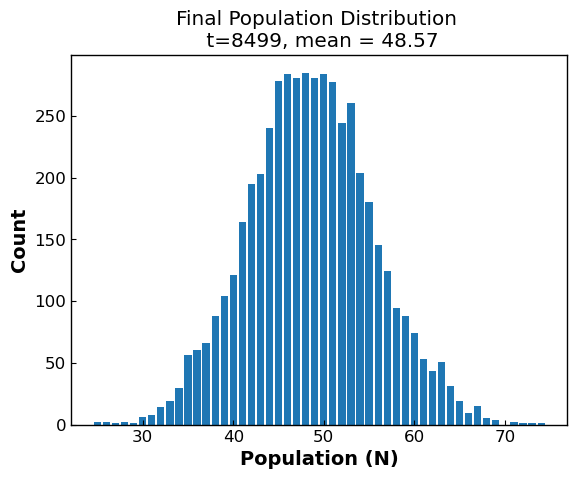

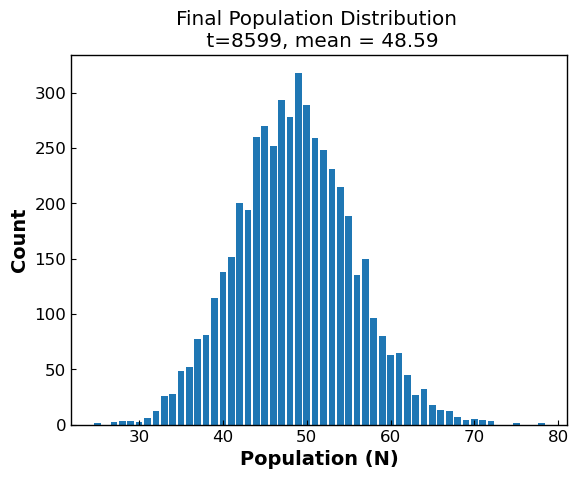

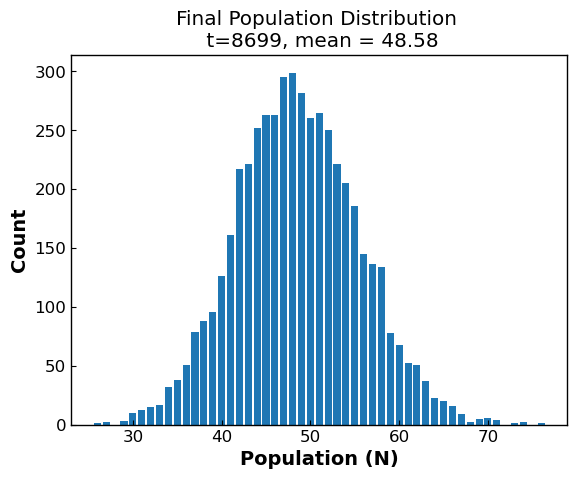

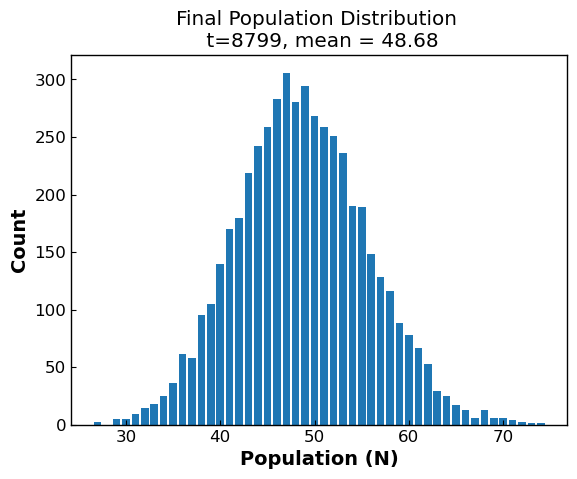

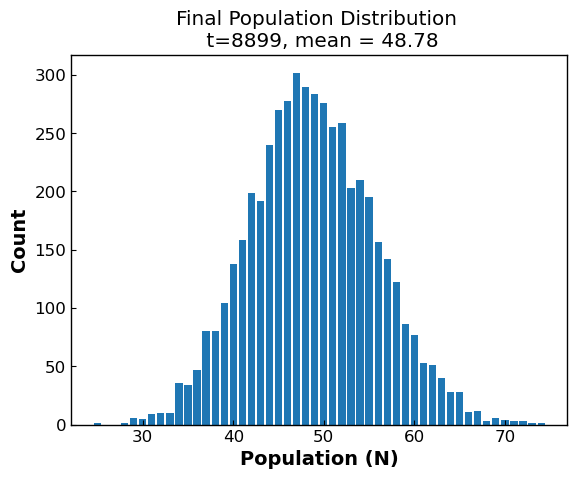

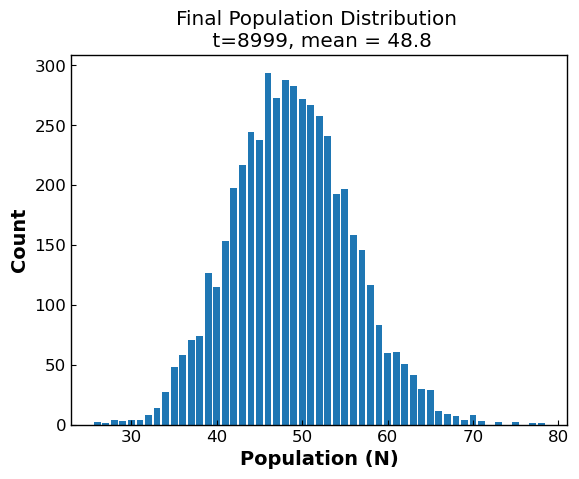

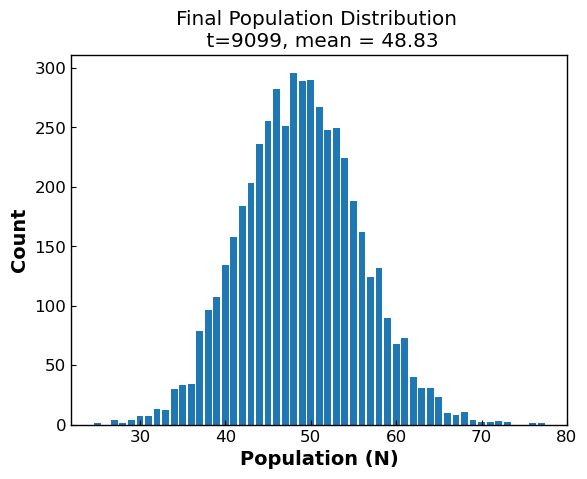

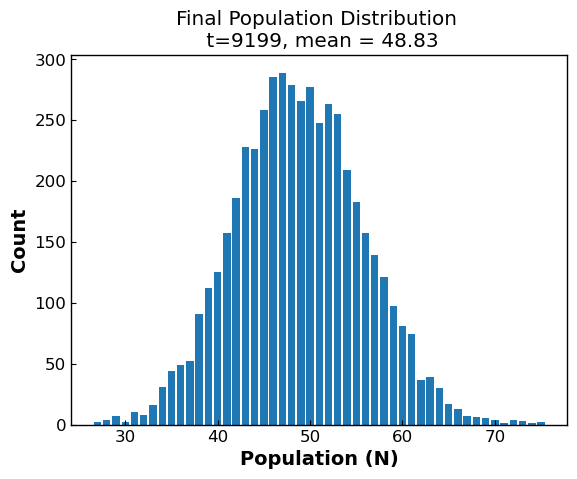

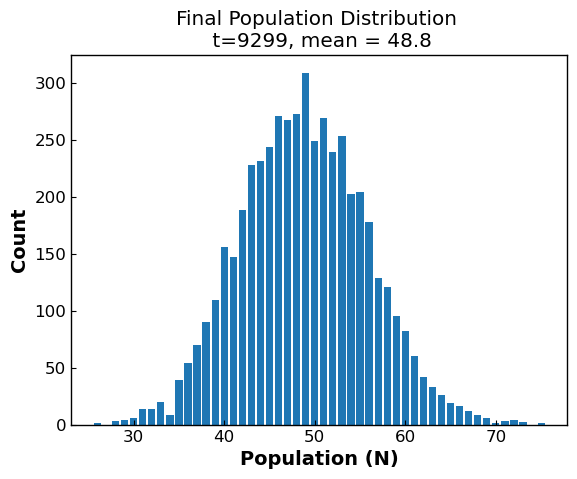

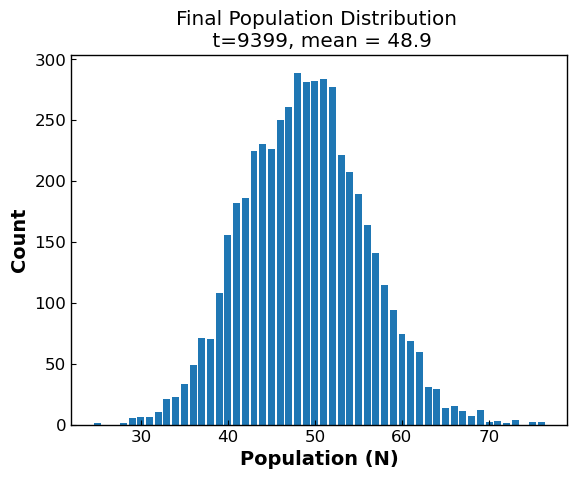

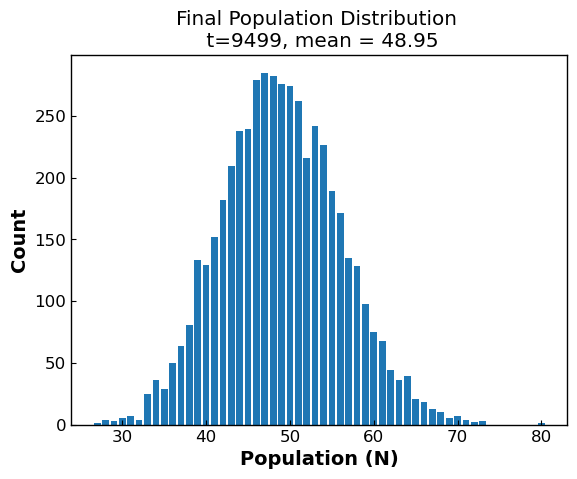

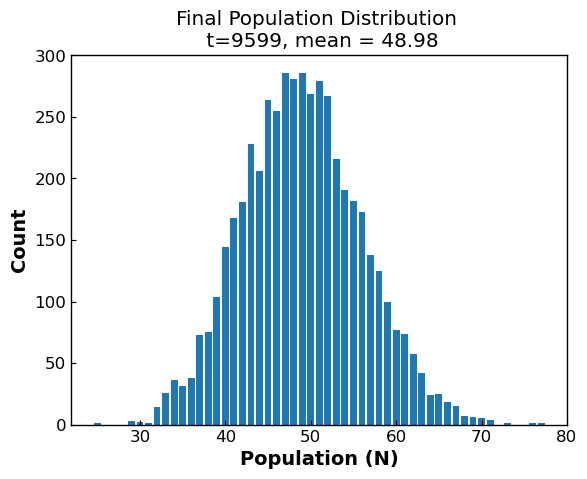

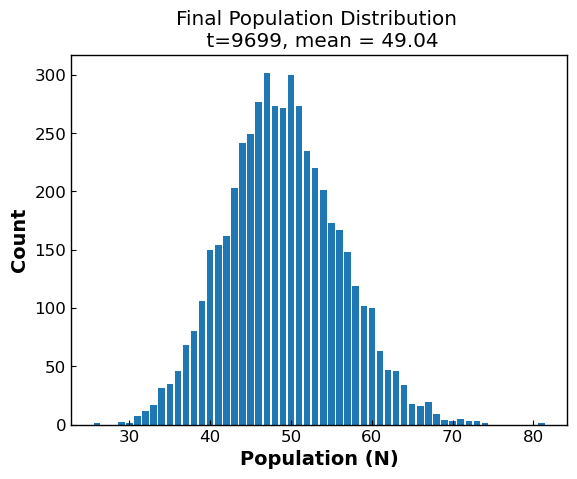

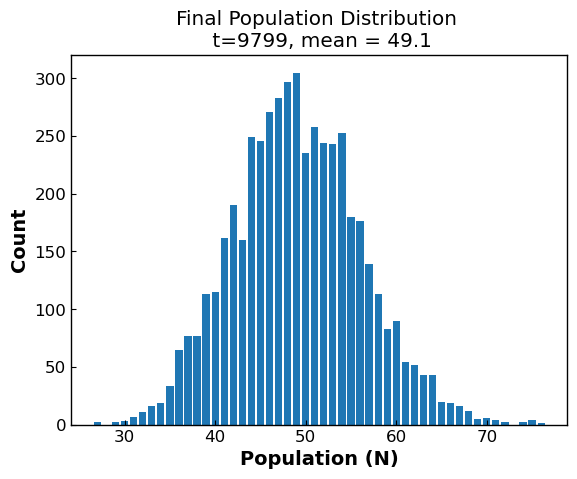

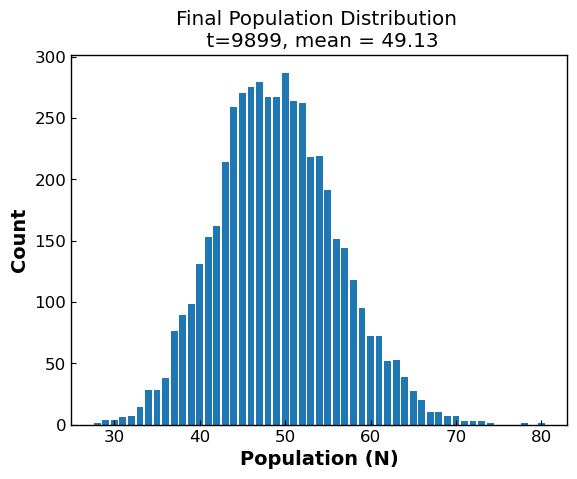

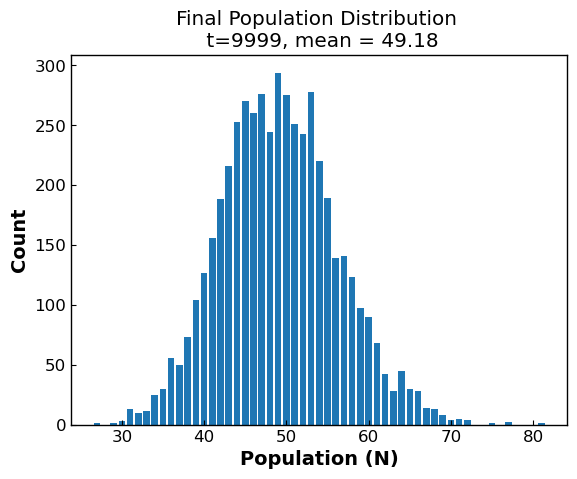

In [9]:
plot_simulation(Ns)

In [10]:
import matplotlib.animation as animation
from IPython.display import HTML

In [11]:
# Code borrowed from animate_solution notebook
def animate_solution(Ns):
    # Initialize plot
    fig, ax = plt.subplots(1, 1, figsize=(8, 4))

    def animate(i):
        """Plot updates for animation"""
        t = (i * 100) + 99
        final_counts = Ns[:, t]
        unique, counts = np.unique(final_counts, return_counts=True)
        distribution_mean = round(np.mean(final_counts), 2)
        ax.clear()
        ax.bar(unique, counts)
        ax.set_xlabel("Population (N)")
        ax.set_ylabel("Count")
        ax.set_title(
            "Final Population Distribution \n t="
            + str(t)
            + " mean = "
            + str(distribution_mean)
        )

    ani = animation.FuncAnimation(fig, animate, frames=100)
    plt.close(fig)

    return ani

In [12]:
ani = animate_solution(Ns)
HTML(ani.to_html5_video())

### Discussion

- From the animation, we can see that the distribution does indeed converge to a stationary distribution.
- As predicted, it is a truncated Poisson distribution centered around 49.
- In this exercise, we essentially created a panel of simulations and plotted the distribution of a given cross-section of time. By doing so, we observe how the distribution evolves over time. For large values of $t$, the distribution converges to a stationary distribution, which is what we observe.